In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

df = pd.read_csv('BankChurners.csv')
df = df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
pip install pycaret


Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install shap


In [18]:
from pycaret.classification import *

# 데이터 불러오기
from pycaret.datasets import get_data
dataset = df

# 분류 모델 설정
clf = setup(data=dataset, target='Attrition_Flag')

# 모델 비교
compare_models()


,Description,Value
0,Session id,3736
1,Target,Attrition_Flag
2,Target type,Binary
3,Target mapping,"Attrited Customer: 0, Existing Customer: 1"
4,Original data shape,"(10127, 20)"
5,Transformed data shape,"(10127, 37)"
6,Transformed train set shape,"(7088, 37)"
7,Transformed test set shape,"(3039, 37)"
8,Ordinal features,1
9,Numeric features,14


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9708,0.9923,0.9708,0.9707,0.9705,0.8898,0.8905,0.4080
gbc,Gradient Boosting Classifier,0.9633,0.9877,0.9633,0.9629,0.9625,0.8580,0.8602,0.7120
ada,Ada Boost Classifier,0.9565,0.9839,0.9565,0.9559,0.9561,0.8353,0.8359,0.3000
rf,Random Forest Classifier,0.9534,0.9861,0.9534,0.9526,0.9518,0.8157,0.8199,0.4970
dt,Decision Tree Classifier,0.9310,0.8680,0.9310,0.9306,0.9307,0.7418,0.7423,0.1170
et,Extra Trees Classifier,0.9299,0.9756,0.9299,0.9295,0.9240,0.6997,0.7188,0.4300
lda,Linear Discriminant Analysis,0.9041,0.9188,0.9041,0.8987,0.8995,0.6125,0.6184,0.1220
ridge,Ridge Classifier,0.8995,0.0000,0.8995,0.8959,0.8862,0.5403,0.5758,0.1420
nb,Naive Bayes,0.8948,0.8686,0.8948,0.8910,0.8923,0.5919,0.5938,0.1070
knn,K Neighbors Classifier,0.8942,0.8787,0.8942,0.8878,0.8893,0.5736,0.5788,0.1660


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3736, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

,Description,Value
0,Session id,8543
1,Target,Attrition_Flag
2,Target type,Binary
3,Target mapping,"Attrited Customer: 0, Existing Customer: 1"
4,Original data shape,"(10127, 20)"
5,Transformed data shape,"(10127, 37)"
6,Transformed train set shape,"(7088, 37)"
7,Transformed test set shape,"(3039, 37)"
8,Ordinal features,1
9,Numeric features,14


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9210,0.8643,0.9210,0.9228,0.9218,0.7134,0.7138
1,0.9408,0.8796,0.9408,0.9397,0.9401,0.7757,0.7761
2,0.9210,0.8430,0.9210,0.9195,0.9201,0.7010,0.7013
3,0.9351,0.8798,0.9351,0.9351,0.9351,0.7596,0.7596
4,0.9351,0.8798,0.9351,0.9351,0.9351,0.7596,0.7596
5,0.9379,0.8850,0.9379,0.9379,0.9379,0.7700,0.7700
6,0.9337,0.8790,0.9337,0.9339,0.9338,0.7552,0.7552
7,0.9450,0.9034,0.9450,0.9456,0.9453,0.7983,0.7984
8,0.9492,0.9088,0.9492,0.9495,0.9493,0.8118,0.8118


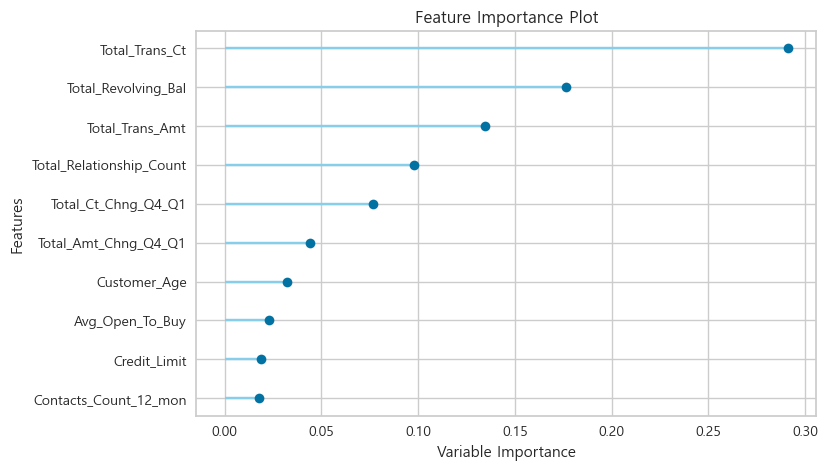

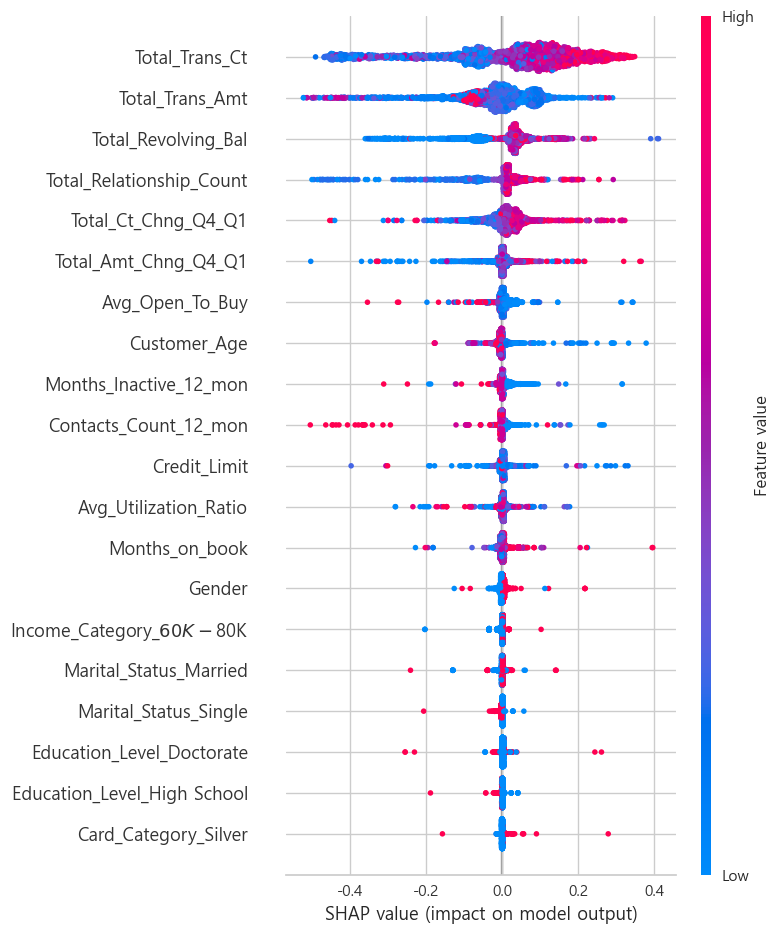

In [13]:
from pycaret.classification import *

# PyCaret에서 모델 설정
clf = setup(data=df, target='Attrition_Flag')

# Decision Tree 모델 생성
model = create_model('dt')

# Feature Importance 시각화
plot_model(model, plot='feature')

# 모델 해석
interpret_model(model, plot='summary')


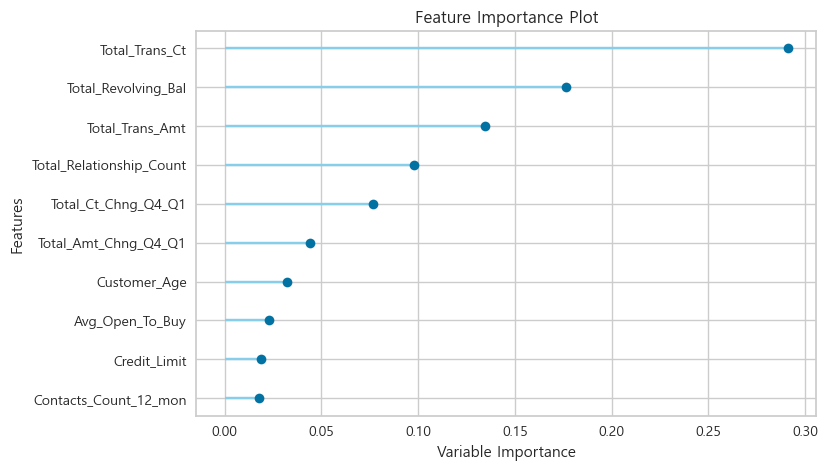

In [14]:
# Decision Tree 모델의 변수 중요도 시각화
plot_model(model, plot='feature')


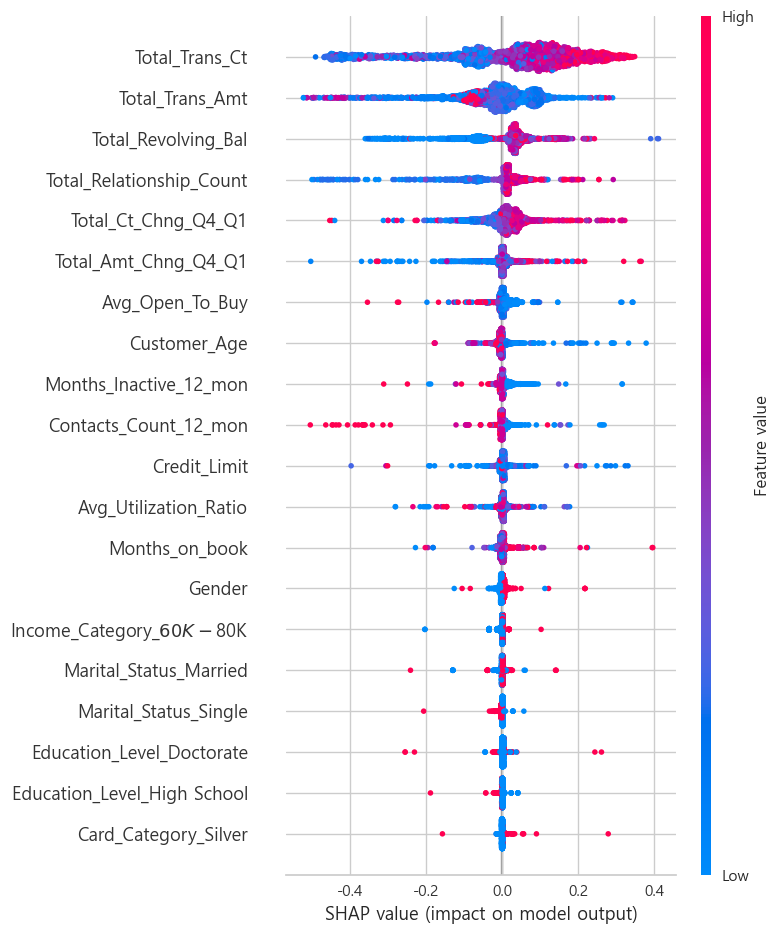

In [15]:
# SHAP 요약 플롯 생성
interpret_model(model)


In [16]:
preprocess_settings = get_config('X_train')
print(preprocess_settings)


      Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
3338            41      M                3       Doctorate         Single   
5002            45      F                3     High School        Married   
8163            58      F                1         College         Single   
9232            45      M                5      Uneducated        Married   
5281            44      F                3         College        Married   
...            ...    ...              ...             ...            ...   
1763            26      F                1         College         Single   
1820            47      M                3         Unknown         Single   
3866            52      M                4      Uneducated        Married   
7639            46      M                3         College        Married   
2293            53      M                3     High School        Married   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Coun